<a href="https://colab.research.google.com/github/JewelEdu/audi_used_car_analysis/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import required libraries and Data Frame For Audi Car**

In [19]:
import numpy as np
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
url = 'https://raw.githubusercontent.com/JewelEdu/audi_used_car_analysis/main/audi.csv'
#df = pd.read_csv("audi.csv")
df = pd.read_csv(url)
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv("audi.csv")
#print(type(df))
#display(df.head())
#display(df.tail())

# **Count the number of unique values present in the 'transmission' column**

In [20]:
print(df["transmission"].value_counts())

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64


# **Transmission values represented in Pie Chart** 

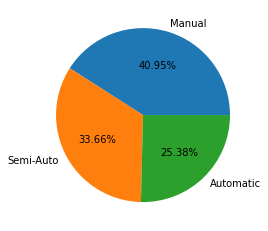

In [21]:
df["transmission"].value_counts().plot(kind="pie",autopct='%1.2f%%')                                  
plt.ylabel("")
plt.show()

# **Percentage of unique values present in the 'transmission' column**

In [22]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"Car_Number"})

df_transmission["% of cars"] = (df_transmission["Car_Number"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,Car_Number,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


# **Barplot for the 'transmission' column**

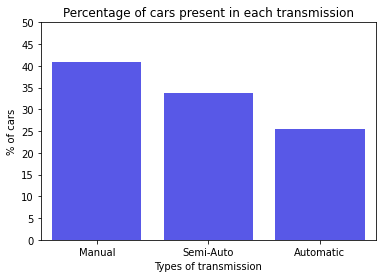

In [23]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="Blue",
            alpha=0.75)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")

plt.yticks(np.arange(0,51,5))

plt.show()

# **Comparison:**

1. Here, in pie chart, manual transmission and semi-auto transmission are almost identical and difficult to compare at a glance although there is a difference of 7 percent or more between them.

2. In my opinion, I think bar charts are more efficient in this presentation. Because in Y-ticks we can easily observe, percentages and comparisons between variables

# **Load the dataset** ***For HW-3***

In [24]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


# **Statistics**

In [25]:
display(df.describe())


,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# **Scatterplot** of **mileage** vs **price** &  **Scatterplot** of **mpg** vs **price**



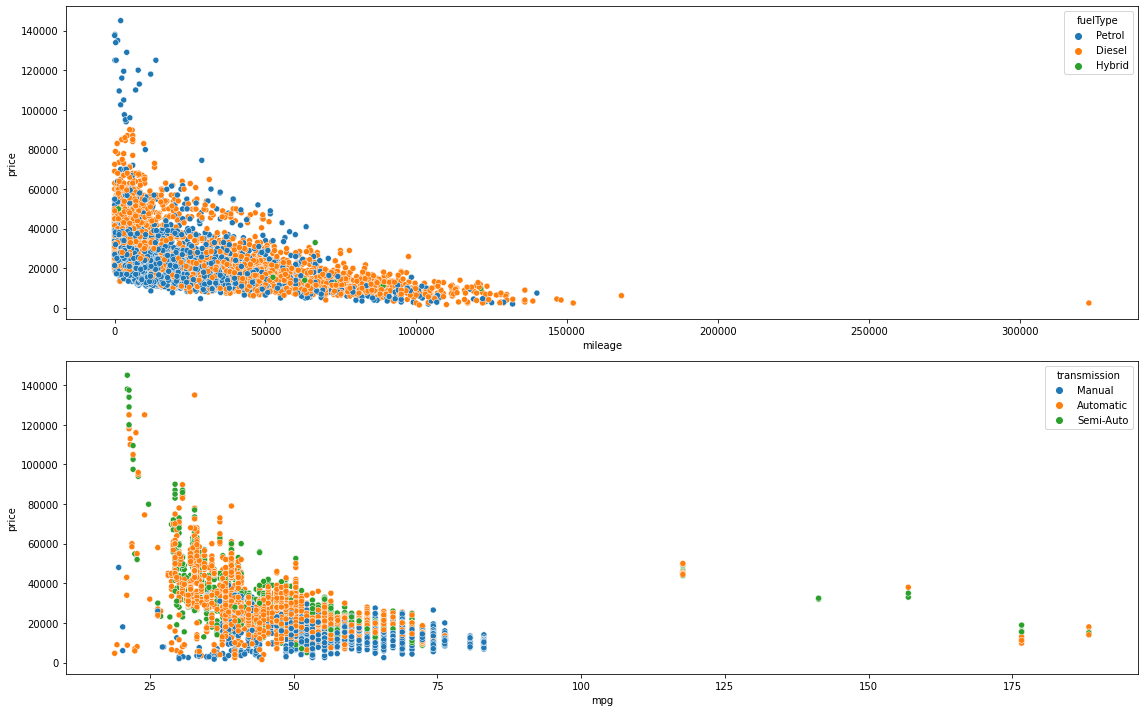

In [26]:
plt.figure(figsize=(16,10))

plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue = "fuelType" ) #hue="model" )

plt.subplot(2, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

The first picture here shows that the mileage of petrol cars is less but the price is much higher. On the other hand the price of diesel cars is less but the mileage is much higher. Meanwhile, the hybrid cars are in line with the price and mileage.


# **Changing** **the** **hue** **parameter**

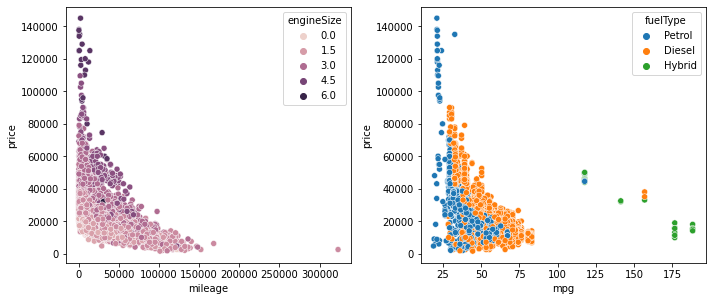

In [27]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="engineSize")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

# **Regression** **plots**

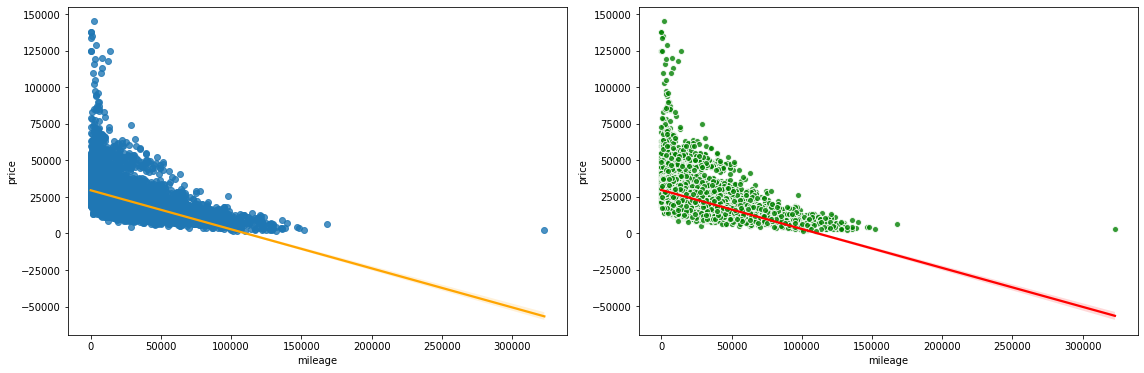

In [28]:
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"orange"})

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df,
            scatter_kws={"color":"green","edgecolor":"white"},line_kws={"color":"red"})

plt.tight_layout()
plt.show()

## **Pairplot**

In [29]:
#sns.pairplot(df)
#plt.show()

# **Pairplot** **without** **redundancy** 

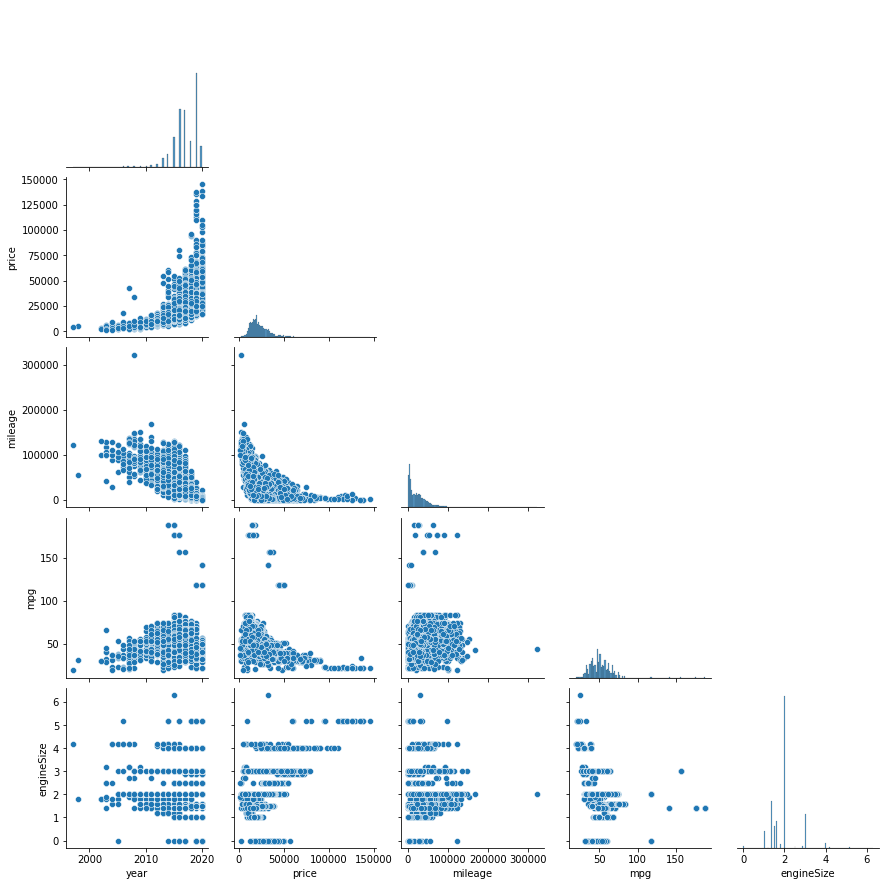

In [30]:
sns.pairplot(df, corner=True)
plt.show()

# **Categorical** **Feature**

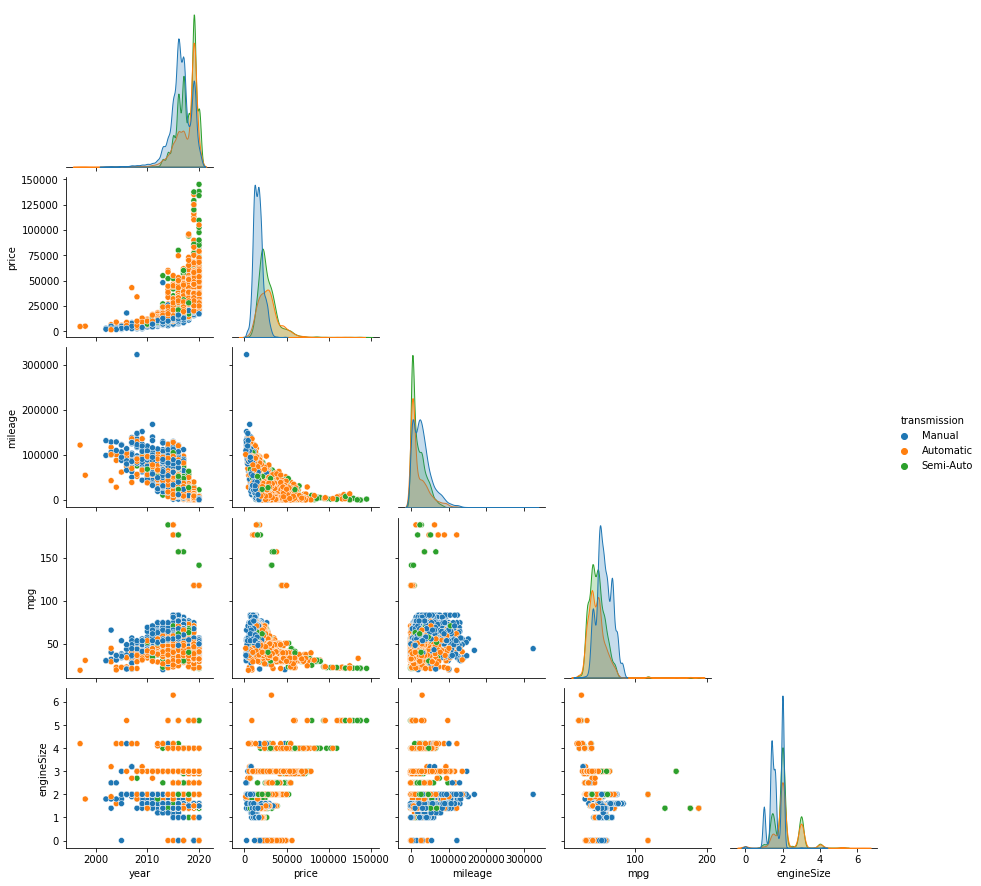

In [31]:
sns.pairplot(df, corner=True, hue="transmission")
plt.show()

# **Adding** **another** **categorical** **feature**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


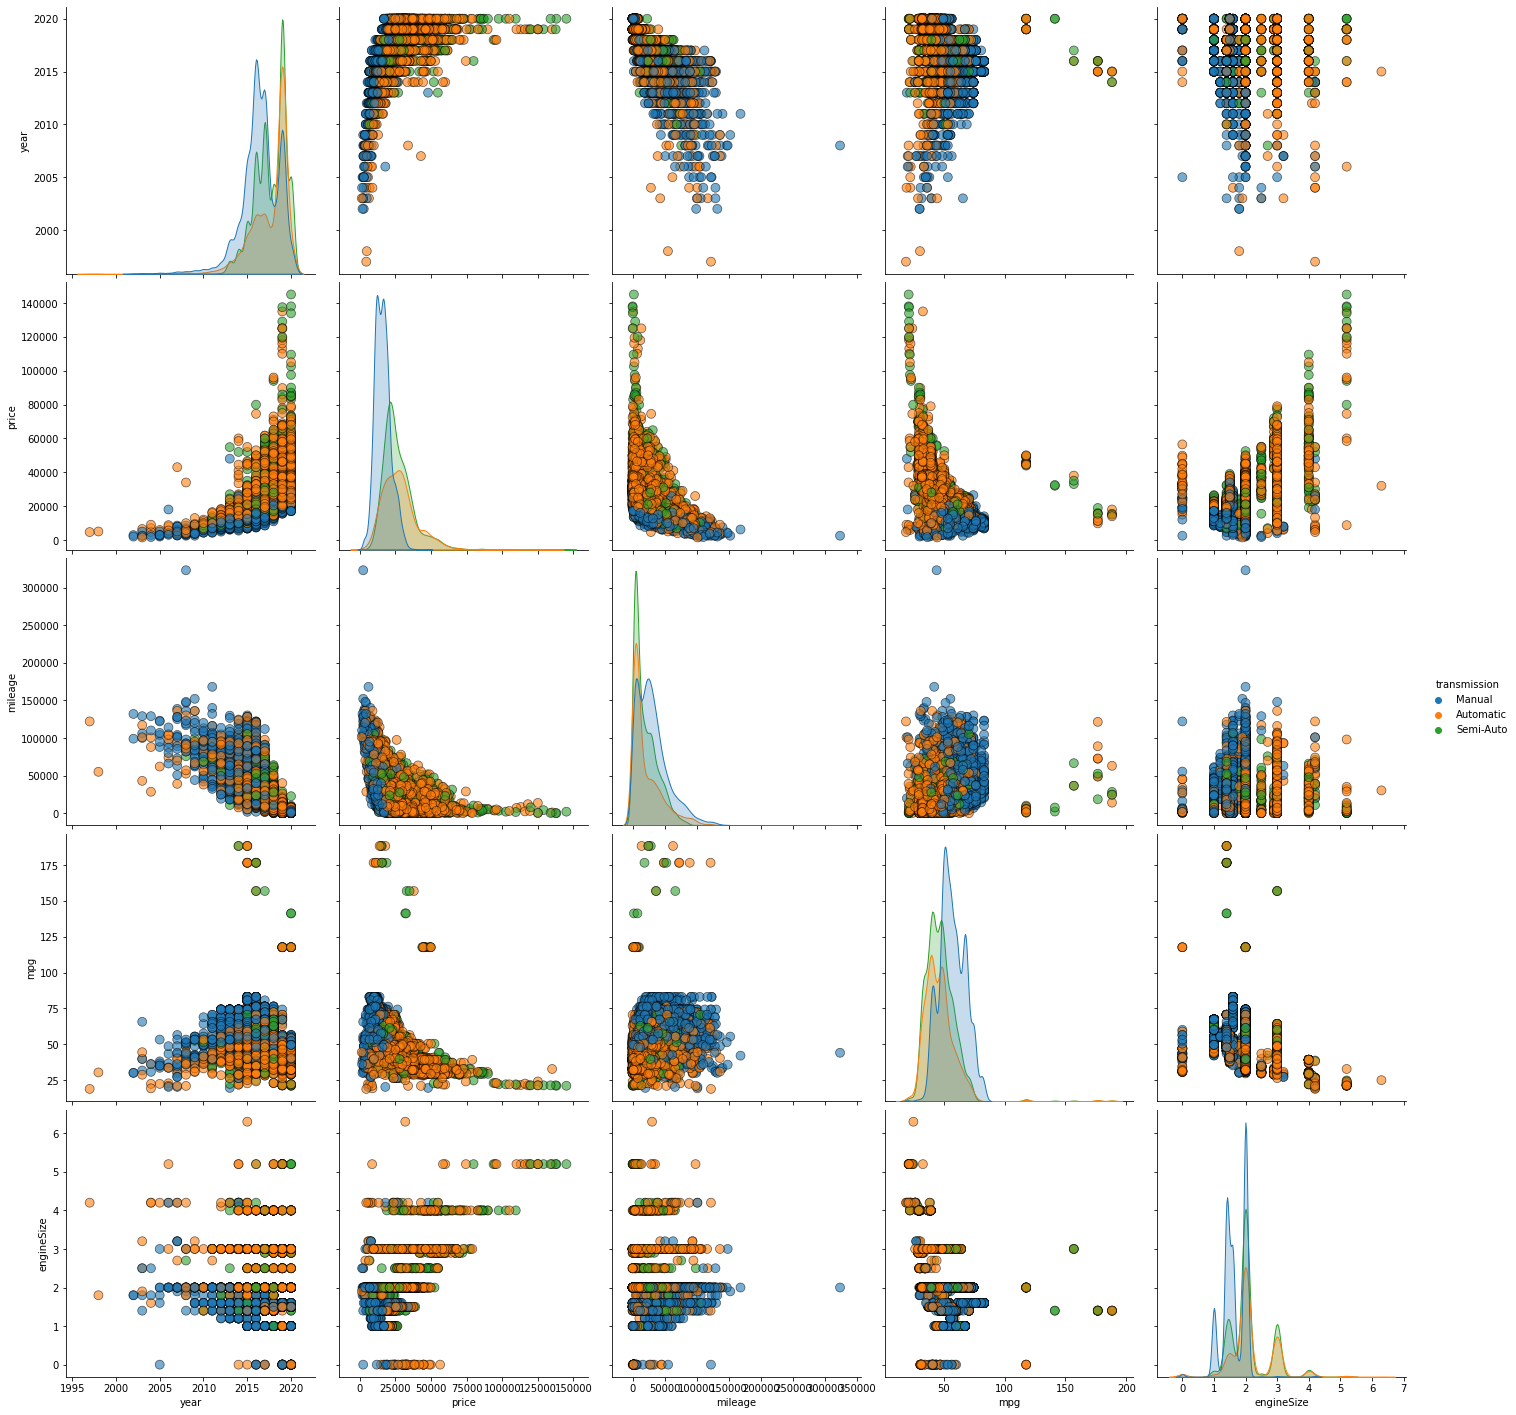

In [32]:
sns.pairplot(df, hue = 'transmission', diag_kind = 'kde', 
plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()